In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
##seaborn e matplotlib pra visualização dos dados, ir treinando com os dois

sns.set(style= "whitegrid")

df = pd.read_csv("../dados/brasileirao2023.csv")
df.drop("Temporada", axis = 1, inplace= True) ##axis 1 pra cortar a coluna inteira
df.head()



,Time,Rodada,Posicao,Pontos,Vitoria,Derrota,Empate,Gols_pro,Gols_contra,Saldo_de_gols,Vitorias_consecutivas,Derrotas_consecutivas,Jogos_marcando,Jogos_sem_sofrer_gols
0,Fluminense,1,1,3,1,0,0,3,0,3,1,0,1,1
1,Flamengo,1,2,3,1,0,0,3,0,3,1,0,1,1
2,Athletico-PR,1,3,3,1,0,0,2,0,2,1,0,1,1
3,Palmeiras,1,4,3,1,0,0,2,1,1,1,0,1,-1
4,Vasco,1,5,3,1,0,0,2,1,1,1,0,1,-1


In [ ]:
df_rodadas = pd.read_csv("../dados/rodadas.csv")
df_rodadas.drop("Temporada", axis = 1, inplace = True)
df_rodadas.head()

,Rodada,Mandante,Visitante,Mandante Placar,Visitante Placar
0,1,Palmeiras,Cuiabá,2,1
1,1,América-MG,Fluminense,0,3
2,1,Botafogo,São Paulo,2,1
3,1,Bragantino,Bahia,2,1
4,1,Athletico-PR,Goiás,2,0


In [ ]:
print("Colunas: \n", df.columns.tolist()) ##ele lista quantas e quais colunas existem

df.info() ##indica se há valores nulos/vazios e os tipos de dados (object(String) / int64(Int))

Colunas: 
 ['Time', 'Rodada', 'Posicao', 'Pontos', 'Vitoria', 'Derrota', 'Empate', 'Gols_pro', 'Gols_contra', 'Saldo_de_gols', 'Vitorias_consecutivas', 'Derrotas_consecutivas', 'Jogos_marcando', 'Jogos_sem_sofrer_gols']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Time                   760 non-null    object
 1   Rodada                 760 non-null    int64 
 2   Posicao                760 non-null    int64 
 3   Pontos                 760 non-null    int64 
 4   Vitoria                760 non-null    int64 
 5   Derrota                760 non-null    int64 
 6   Empate                 760 non-null    int64 
 7   Gols_pro               760 non-null    int64 
 8   Gols_contra            760 non-null    int64 
 9   Saldo_de_gols          760 non-null    int64 
 10  Vitorias_consecutivas  760 non-null    int64 
 11  Derrota

In [ ]:
df['Jogos'] = df['Vitoria'] + df['Empate'] + df['Derrota']
jogos_por_time = df.groupby('Time')['Jogos'].max()
jogos_por_time.head()

Time
América-MG      38
Athletico-PR    38
Atlético-MG     38
Bahia           38
Botafogo        38
Name: Jogos, dtype: int64

In [ ]:
gols_por_time = df.groupby("Time")["Gols_pro"].max() ##para cada time, me mostra quantidade máxima de gols
##dentro de cada grupo, eu só quero ver o valor "gols", e ele pega o valor máximo
gols_por_time.head()

Time
América-MG      42
Athletico-PR    51
Atlético-MG     52
Bahia           50
Botafogo        58
Name: Gols_pro, dtype: int64

C:\Users\erika\AppData\Local\Temp\ipykernel_1608\921607174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gols_por_time_ordenado.index, y=gols_por_time_ordenado.values, palette= "plasma",) ##tipo um dic/enum, pega a chave (index) e o valor (value)


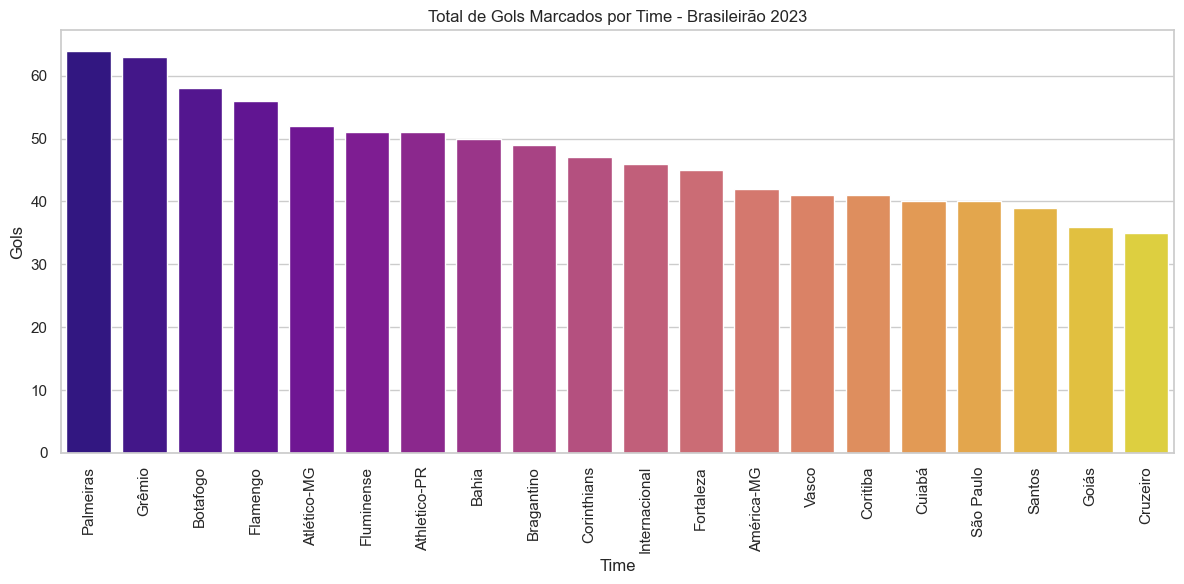

In [ ]:
gols_por_time_ordenado = gols_por_time.sort_values(ascending = False) ##ordem decrescente

plt.figure(figsize=(12,6))
sns.barplot(x=gols_por_time_ordenado.index, y=gols_por_time_ordenado.values, palette= "plasma",) ##tipo um dic/enum, pega a chave (index) e o valor (value)
plt.xticks(rotation=90)
plt.title("Total de Gols Marcados por Time - Brasileirão 2023")
plt.xlabel("Time")
plt.ylabel("Gols")
plt.tight_layout()
plt.show()


In [ ]:
gols_totais = gols_por_time.sum()
jogos_totais = jogos_por_time.sum()
media_gols = gols_totais / jogos_totais
print(f"Média de gols por jogo no brasileirão 2023: {media_gols:.2f}")

Média de gols por jogo no brasileirão 2023: 1.24


In [ ]:
classificacao = df.groupby("Time").agg({
    "Pontos": "max",
    "Posicao": "last",
    "Saldo_de_gols": "last",
    "Gols_pro": "last",
    "Gols_contra": "last"
})

classificacao["Jogos"] = jogos_por_time
classificacao["Media_de_gols"] = classificacao["Gols_pro"] / classificacao["Jogos"]
classificacao["Media_de_gols"] = classificacao["Media_de_gols"].round(2) ##2 casas decimais

In [ ]:
classificacao = classificacao.sort_values(by = "Pontos" ,ascending = False)
classificacao

,Pontos,Posicao,Saldo_de_gols,Gols_pro,Gols_contra,Jogos,Media_de_gols
Time,,,,,,,
Palmeiras,70,1,31,64,33,38,1.68
Grêmio,68,2,7,63,56,38,1.66
Atlético-MG,66,3,20,52,32,38,1.37
Flamengo,66,4,14,56,42,38,1.47
Botafogo,64,5,21,58,37,38,1.53
Bragantino,62,6,14,49,35,38,1.29
Athletico-PR,56,8,8,51,43,38,1.34
Fluminense,56,7,4,51,47,38,1.34
Internacional,55,9,1,46,45,38,1.21


C:\Users\erika\AppData\Local\Temp\ipykernel_1608\1277646803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classificacao.index, y=classificacao["Media_de_gols"], palette="viridis")


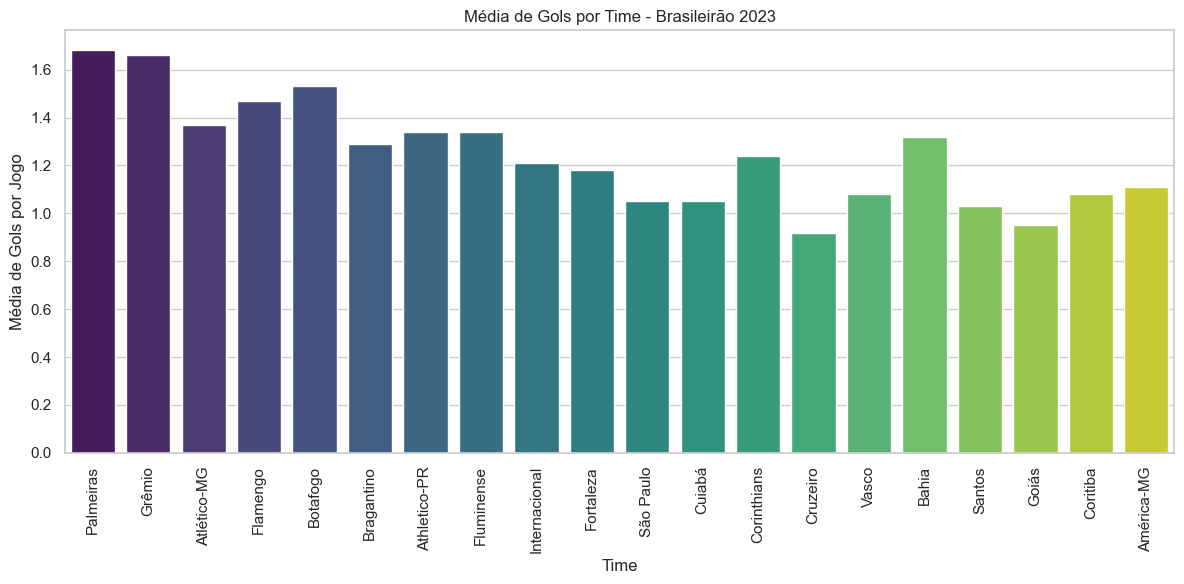

In [ ]:

plt.figure(figsize=(12,6))
sns.barplot(x=classificacao.index, y=classificacao["Media_de_gols"], palette="viridis")
plt.xticks(rotation=90)
plt.title("Média de Gols por Time - Brasileirão 2023")
plt.xlabel("Time")
plt.ylabel("Média de Gols por Jogo")
plt.tight_layout()
plt.show()